<a href="https://colab.research.google.com/github/rajuzumaki2207/Time_series_Sequence/blob/main/RUL_TurboFan/3_TurboFan_XGR_LGBMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20,10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

## Import Data

In [5]:
## Train data and Test data
# define column names for easy indexing
index_names = ['id', 'cycles']
setting_names = ['op1', 'op2', 'op3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names
train = pd.read_csv("/content/drive/MyDrive/ML/Projects/RUL_TurboFan/train_FD001.txt", sep = "\s+", names=col_names)
test = pd.read_csv("/content/drive/MyDrive/ML/Projects/RUL_TurboFan/test_FD001.txt", sep = "\s+", names =col_names)
y_test = pd.read_csv('/content/drive/MyDrive/ML/Projects/RUL_TurboFan/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

In [6]:
test_df= test.groupby('id').agg({'cycles':'max'})

In [7]:
test_df

,cycles
id,
1,31
2,49
3,126
4,106
5,98
...,...
96,97
97,134
98,121


In [8]:
y_test['cycles']=test_df['cycles'].values

In [9]:
y_test

,RUL,cycles
0,112,31
1,98,49
2,69,126
3,82,106
4,91,98
...,...,...
95,137,97
96,82,134
97,59,121
98,117,97


In [10]:
test_df['cycles']= y_test["RUL"].values + y_test["cycles"].values

In [11]:
test_df

,cycles
id,
1,143
2,147
3,195
4,188
5,189
...,...
96,234
97,216
98,180


In [12]:
train_df = train.groupby('id').agg({'cycles':'max'})

## Add RUL with add_rul function

In [13]:
def add_rul(df, max_df):
   # Get the total number of cycles for each unit
    max_cycle= max_df['cycles']
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='id', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [14]:
## Add RUL
train = add_rul(train, train_df)

In [15]:
train 

,id,cycles,op1,op2,op3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [16]:
test= add_rul(test, test_df)

In [17]:
test.head()

,id,cycles,op1,op2,op3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138


In [18]:
## temp dataframes

data = train.copy()

test_data = test.copy()

In [19]:
test_data['increasing']=test_data['s_2']+ test_data['s_3']+ test_data['s_4']+test_data['s_8']+test_data['s_13']+ test_data['s_15']+test_data['s_17']

In [20]:
data['increasing']= data['s_2']+ data['s_3']+ data['s_4']+data['s_8']+data['s_13']+ data['s_15']+data['s_17']

data

,id,cycles,op1,op2,op3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,increasing
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,8808.6195
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,8813.6518
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,8809.0678
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,8803.5682
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,8808.9694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,8852.0456
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,8861.5839
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,8857.1046
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,8855.0389


In [21]:
data['decreasing']=data['s_7']+data['s_12'] + data['s_20'] + data['s_21']

test_data['decreasing']=test_data['s_7']+test_data['s_12'] + test_data['s_20'] + test_data['s_21']

In [22]:
def plot_sensor(sensor_name,X):
    plt.figure(figsize=(13,5))
    for i in X['id'].unique():
        if (i % 10 == 0):  # only plot every 10 engine
            plt.plot('RUL', sensor_name, 
                     data=X[X['id']==i])
            #plt.axvline(60, color='red', linestyle='dashed', linewidth=4)
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


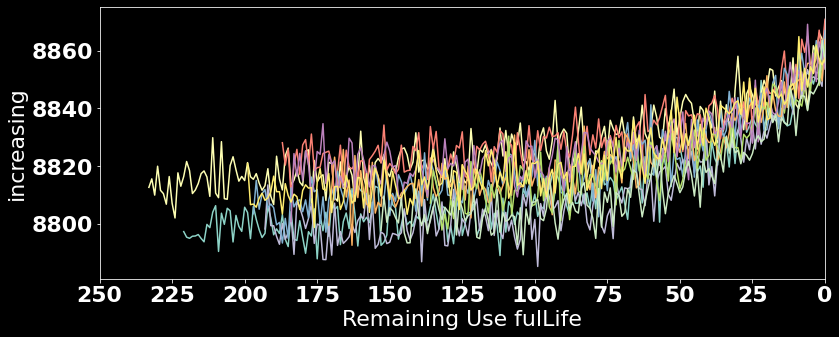

In [23]:
plot_sensor('increasing',data)

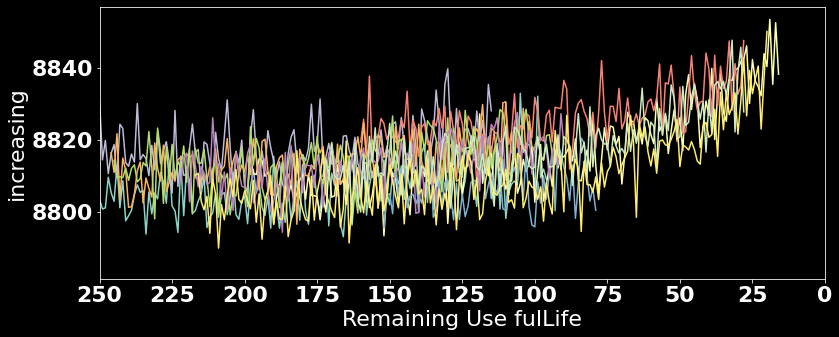

In [24]:
plot_sensor('increasing',test_data)

In [25]:
test_data[test_data.RUL == test_data.RUL.min()]

,id,cycles,op1,op2,op3,s_1,s_2,s_3,s_4,s_5,...,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,increasing,decreasing
4267,34,203,-0.0011,-0.0001,100.0,518.67,643.74,1600.38,1427.49,14.62,...,8.5158,0.03,397,2388,100.0,38.62,23.0641,7,8853.6658,1132.8941


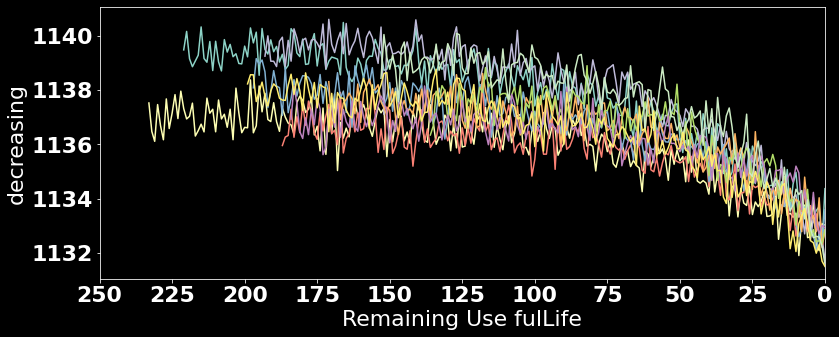

In [26]:
plot_sensor('decreasing',data)

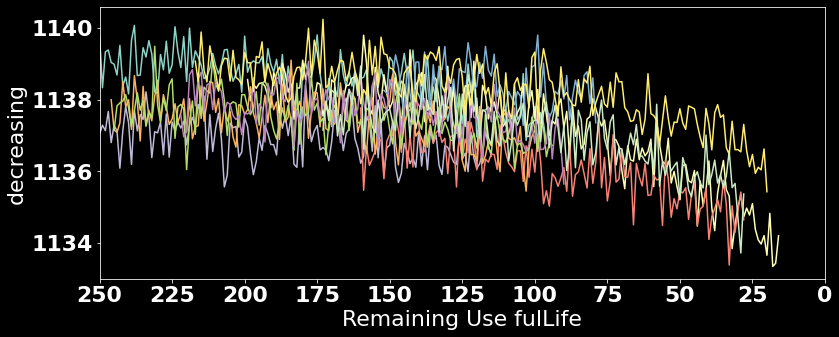

In [27]:
plot_sensor('decreasing',test_data)

In [28]:
from scipy.signal import savgol_filter
def get_correlation_plots(component,a,train_PCA,x=250,y=25):
    plt.figure(figsize=(20,10))
    for engine in train_PCA.id.unique():
        if engine%10==0:
            data= train_PCA[train_PCA['id']==engine]
            y1=data[component].ewm(com=0.1).mean()
            y1= savgol_filter(y1, a, 3)
            #plt.figure(figsize=(10,4))
            plt.plot(data['RUL'],y1)
            #plt.plot(random['RUL'], random['ssensor_2'])
            plt.xlim(x, 0)  # reverse the x-axis so RUL counts down to zero
            plt.xticks(np.arange(0, x, y))
            plt.ylabel('Exponential Weighted Moving Average')
            plt.xlabel('Remaining Use fulLife')
            plt.grid(True)
    plt.show()


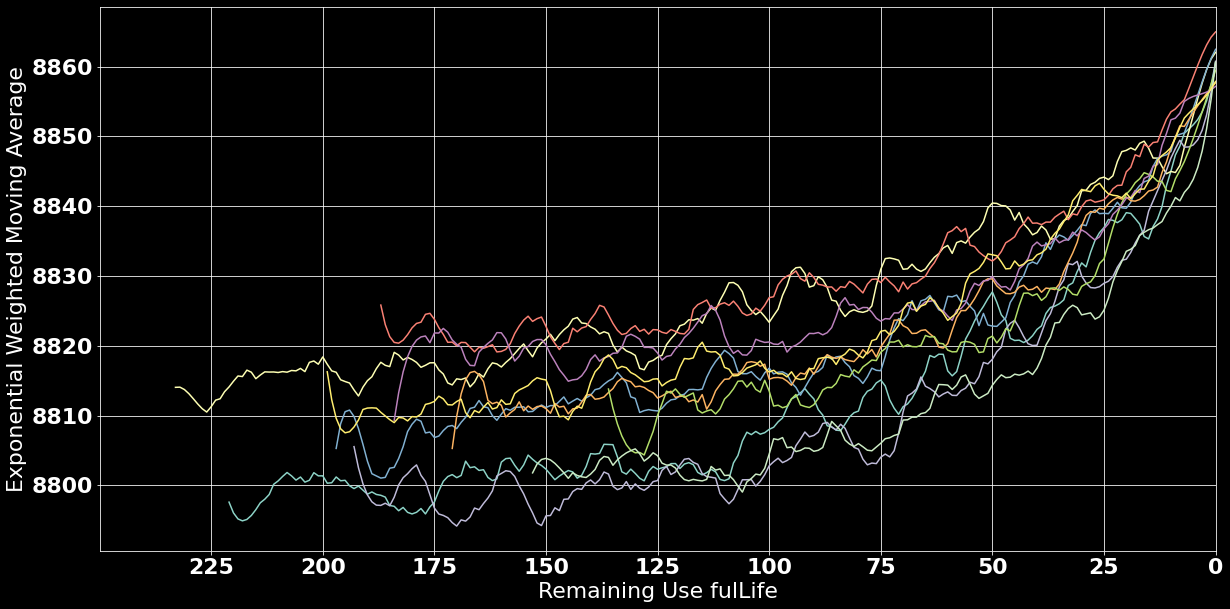

In [29]:
get_correlation_plots('increasing',15,data)

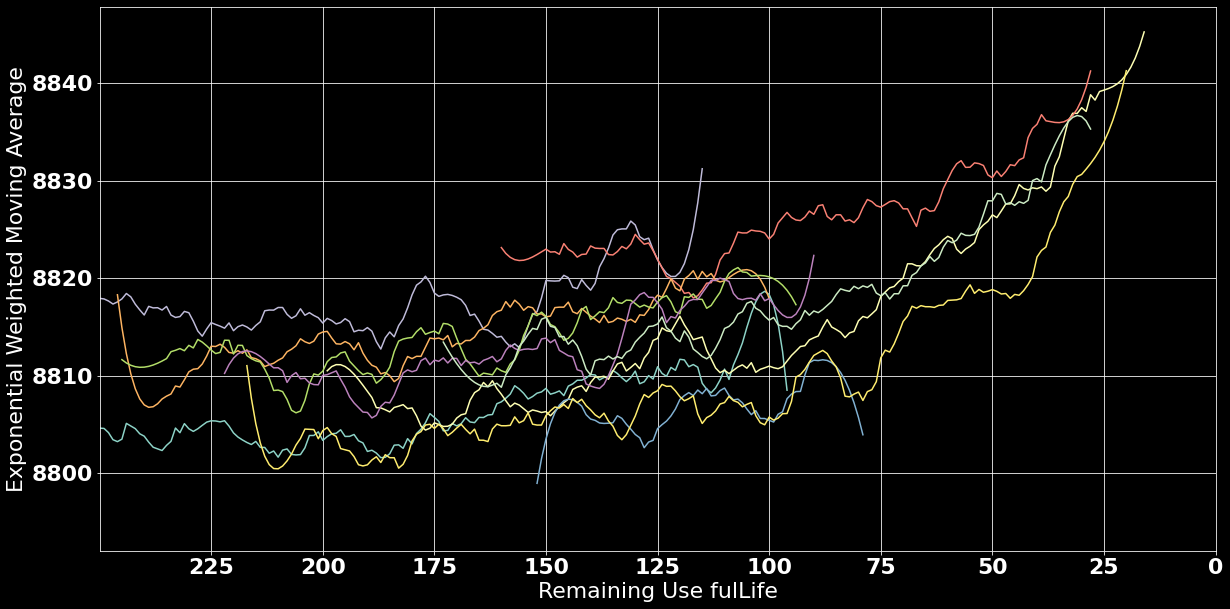

In [30]:
get_correlation_plots('increasing',21,test_data)

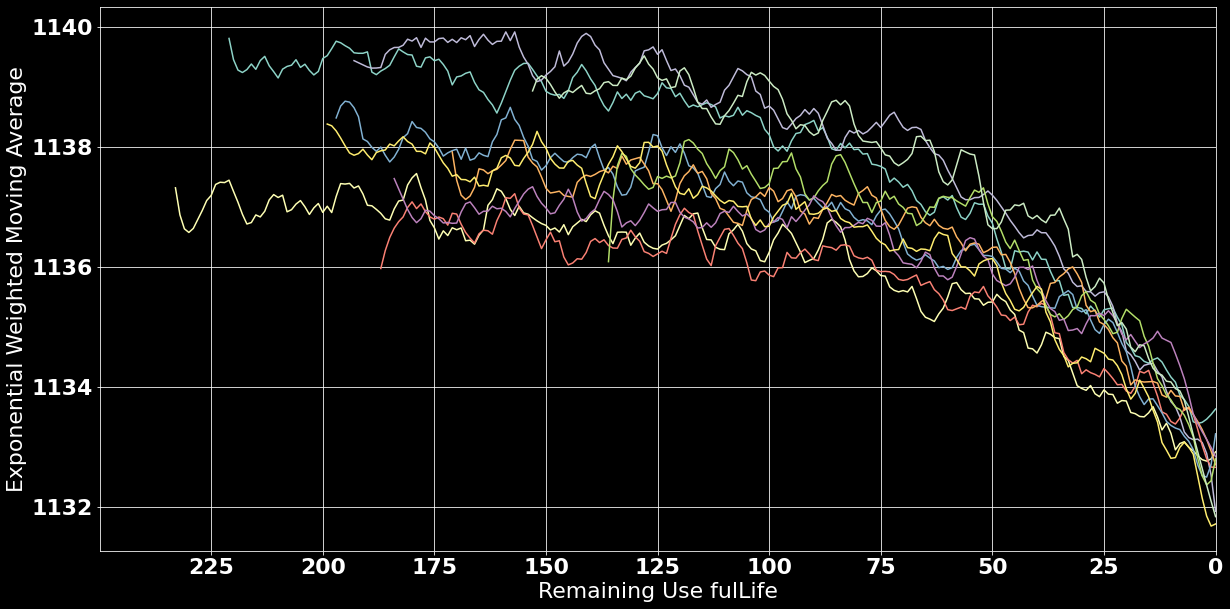

In [31]:
get_correlation_plots('decreasing',11,data)

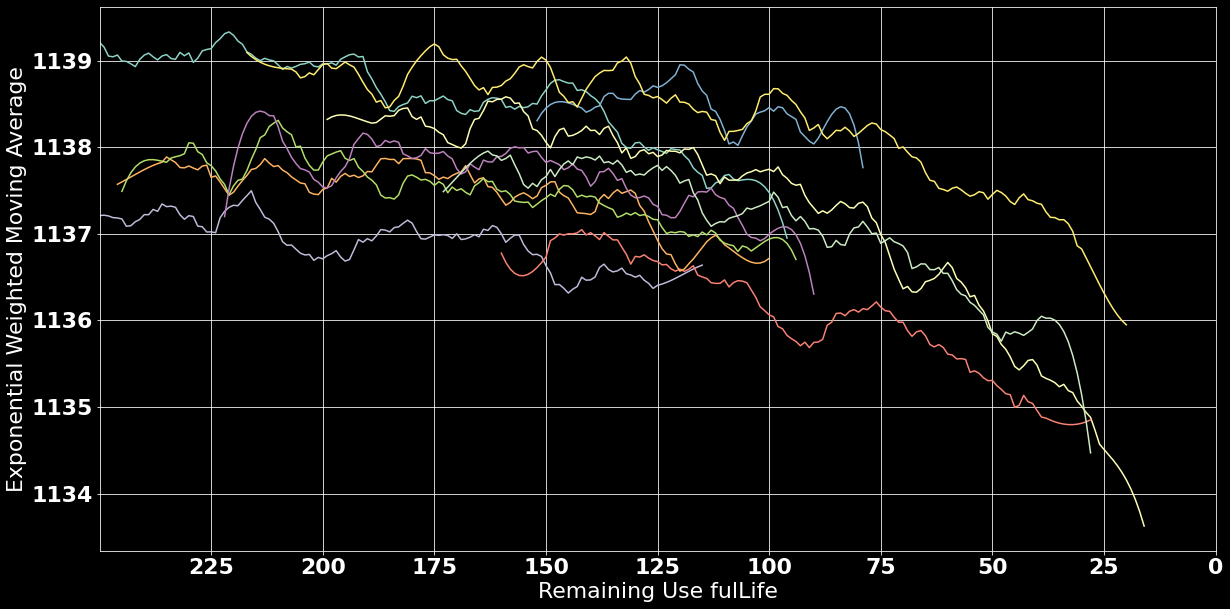

In [32]:
get_correlation_plots('decreasing',21,test_data)

In [33]:
corr_train=[]

for engine in data.id.unique():
    X= data[data['id']==engine]
    x1=X['increasing'].ewm(com=0.5).mean()
    x1= savgol_filter(x1, 27, 3)
    corr_train.append(x1)

In [34]:
corr_test=[]

for engine in test_data.id.unique():
    data1= test_data[test_data['id']==engine]
    y1=data1['increasing'].ewm(com=0.5).mean()
    y1= savgol_filter(y1, 27, 3)
    corr_test.append(y1)

In [35]:
def get_flat_list(comp):
    flat_list = [item for sublist in comp for item in sublist]
    return flat_list

In [36]:
corr_train=get_flat_list(corr_train)


In [37]:
corr_test=get_flat_list(corr_test)

In [38]:
data['EWM']= corr_train

In [39]:
test_data['EWM']=corr_test

In [40]:
data["week"] = (data["RUL"]/7).astype(int)

In [41]:
data[["week", "EWM"]].describe()

,week,EWM
count,20631.000000,20631.000000
mean,14.975474,8819.862705
std,9.840102,14.444920
min,0.000000,8789.857997
25%,7.000000,8808.873847
50%,14.000000,8817.895378
75%,22.000000,8828.093397
max,51.000000,8864.902501


In [42]:
 Q3  = np.quantile(data["EWM"], 0.75)
 Q1 = np.quantile(data["EWM"], 0.25)

In [43]:
IQR= Q3-Q1
IQR

19.219549709574494

In [44]:
Outlier_line = Q3+ 1.5*IQR
Outlier_line 

8856.92272122655

In [45]:
int(191/7)

27

In [46]:
test_data["week"] = (data["RUL"]/7).astype(int)

### RUL for risky EWMA per Week (Train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'RUL for risky EWMA per week')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


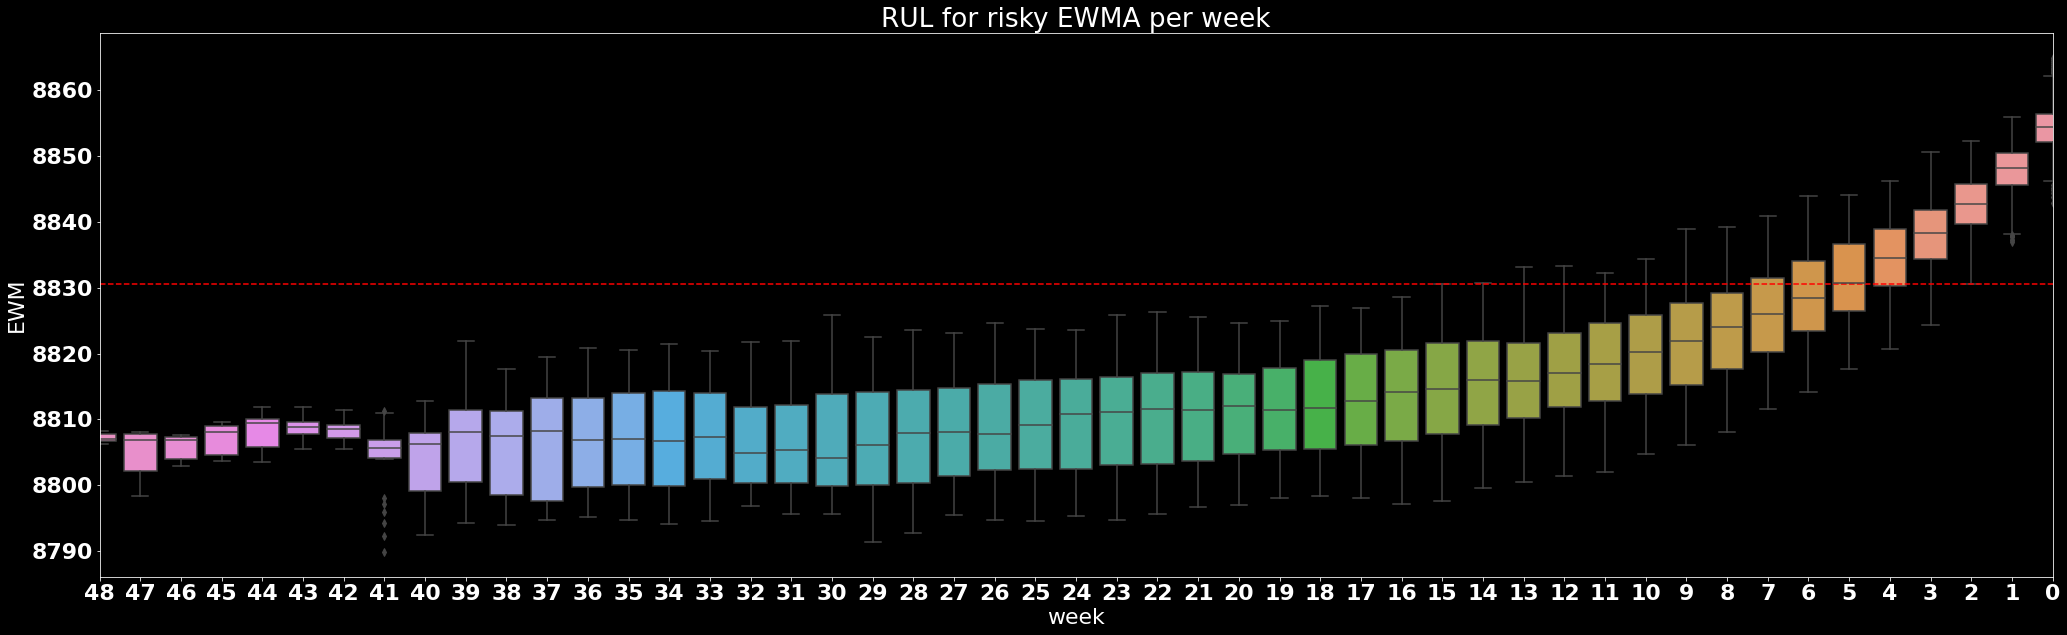

In [47]:
plt.figure(figsize=(35,10))

sns.boxplot('week','EWM',data=data)
plt.xlim(48,0)
plt.axhline(8830.59,color='red', linestyle='dashed', linewidth=1.5)

plt.title('RUL for risky EWMA per week')

### RUL for risky EWMA per Week (Test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'RUL for risky EWMA per week')

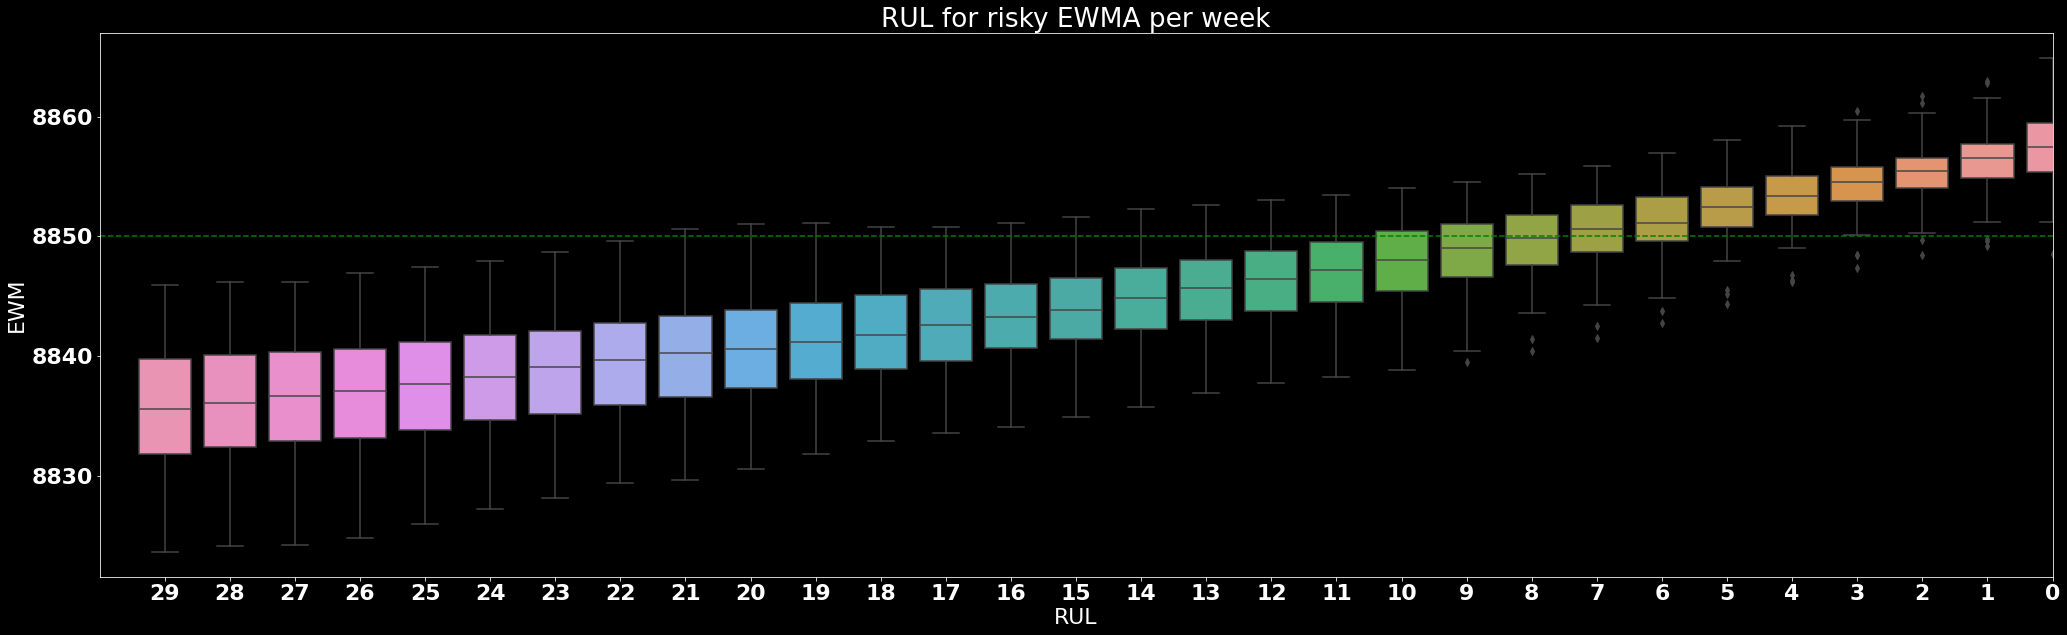

In [48]:
plt.figure(figsize=(35,10))

sns.boxplot('RUL','EWM',data=data[data['RUL']<30])
plt.xlim(30,0)
plt.axhline(8850,color='green', linestyle='dashed', linewidth=1.5)
plt.title('RUL for risky EWMA per week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


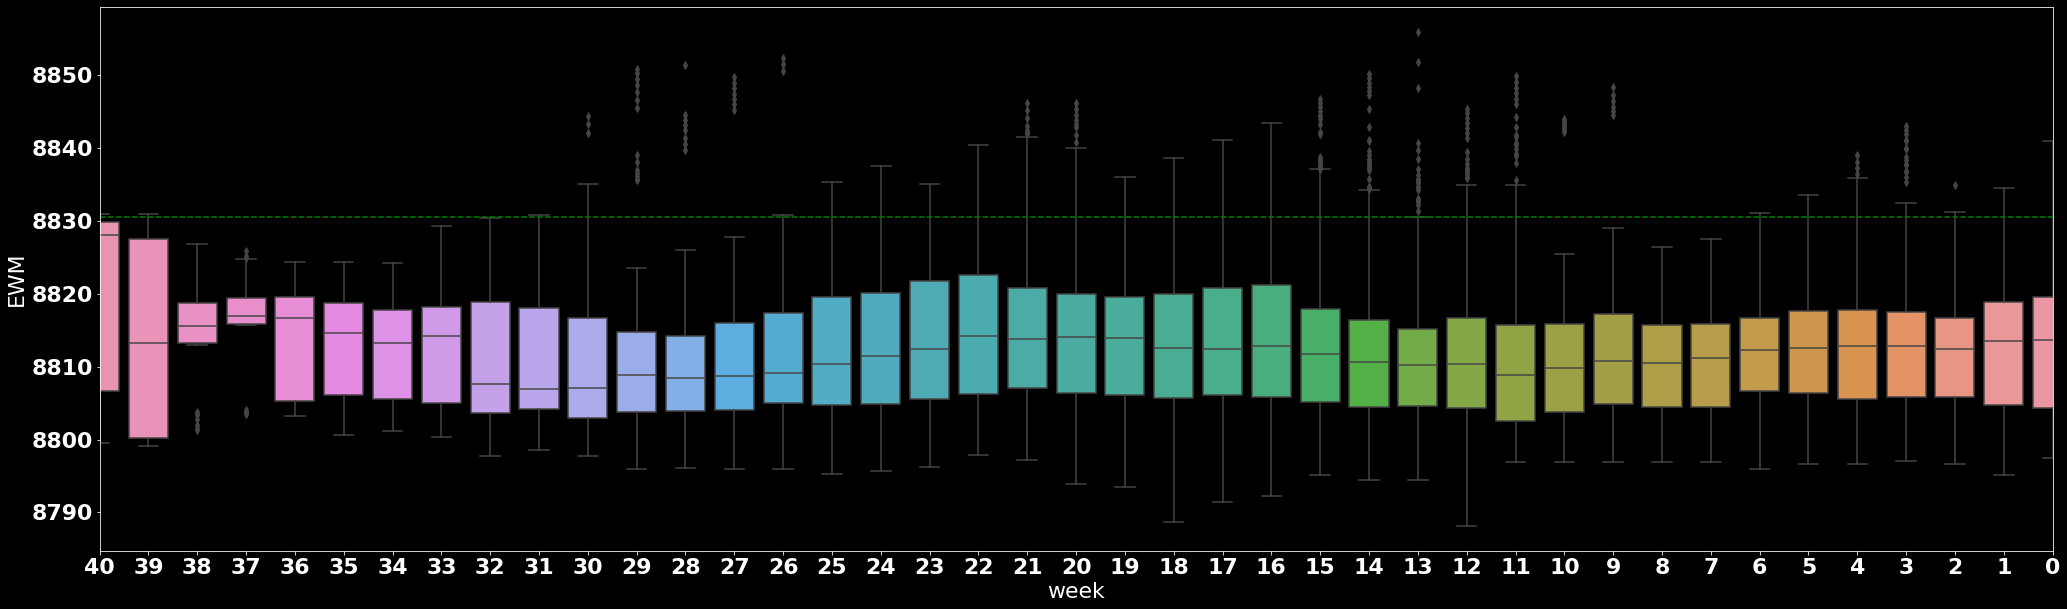

In [49]:
plt.figure(figsize=(35,10))

sns.boxplot('week','EWM',data=test_data)
plt.xlim(40,0)
plt.axhline(8830.59,color='green', linestyle='dashed', linewidth=1.5)

In [50]:
## Define all RUL as healthy
data['Health']='Healthy'

test_data['Health']='Healthy'

In [51]:
def get_health(data):
    for i in range(len(data)):
        if data.loc[i,'RUL']<30:
            if data.loc[i,'EWM']>8830:
                data.loc[i,'Health']='Unhealthy'
            else:
                data.loc[i,'Health']= 'Health cannot be determined'
                cycle= data.loc[i,'cycles']
                engine= data.loc[i,'id']
                print(f'Cannot determine health for engine cycle Check manually for Engine {engine}: Cycle {cycle}')
    
    return data

In [52]:
data3 = get_health(data)

Cannot determine health for engine cycle Check manually for Engine 3: Cycle 150
Cannot determine health for engine cycle Check manually for Engine 3: Cycle 151
Cannot determine health for engine cycle Check manually for Engine 3: Cycle 152
Cannot determine health for engine cycle Check manually for Engine 4: Cycle 160
Cannot determine health for engine cycle Check manually for Engine 4: Cycle 161
Cannot determine health for engine cycle Check manually for Engine 4: Cycle 162
Cannot determine health for engine cycle Check manually for Engine 4: Cycle 163
Cannot determine health for engine cycle Check manually for Engine 9: Cycle 172
Cannot determine health for engine cycle Check manually for Engine 9: Cycle 173
Cannot determine health for engine cycle Check manually for Engine 9: Cycle 174
Cannot determine health for engine cycle Check manually for Engine 9: Cycle 175
Cannot determine health for engine cycle Check manually for Engine 9: Cycle 176
Cannot determine health for engine cycle

In [53]:
data3[data3.Health=="Health cannot be determined"]

,id,cycles,op1,op2,op3,s_1,s_2,s_3,s_4,s_5,...,s_18,s_19,s_20,s_21,RUL,increasing,decreasing,EWM,week,Health
628,3,150,0.0002,-0.0003,100.0,518.67,643.08,1591.34,1407.58,14.62,...,2388,100.0,38.84,23.2518,29,8819.6595,1137.2118,8828.027515,4,Health cannot be determined
629,3,151,0.0009,-0.0000,100.0,518.67,643.04,1594.47,1420.87,14.62,...,2388,100.0,38.74,23.2479,28,8835.9120,1136.0679,8828.421775,4,Health cannot be determined
630,3,152,-0.0020,-0.0003,100.0,518.67,643.34,1599.53,1411.65,14.62,...,2388,100.0,38.86,23.3026,27,8834.0818,1136.7426,8829.112425,3,Health cannot be determined
817,4,160,-0.0004,0.0005,100.0,518.67,643.24,1597.66,1412.93,14.62,...,2388,100.0,38.71,23.2558,29,8831.4573,1136.5458,8828.679729,4,Health cannot be determined
818,4,161,-0.0000,0.0004,100.0,518.67,643.02,1590.53,1413.51,14.62,...,2388,100.0,38.72,23.1832,28,8828.7241,1135.3732,8828.674167,4,Health cannot be determined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,97,173,0.0003,0.0005,100.0,518.67,642.33,1593.36,1415.43,14.62,...,2388,100.0,38.61,23.2418,29,8829.6939,1136.2618,8826.457687,4,Health cannot be determined
20061,97,174,-0.0014,0.0000,100.0,518.67,642.97,1592.52,1418.99,14.62,...,2388,100.0,39.08,23.2683,28,8833.0707,1136.5283,8827.073278,4,Health cannot be determined
20062,97,175,0.0011,0.0005,100.0,518.67,642.58,1599.64,1414.21,14.62,...,2388,100.0,38.82,23.2674,27,8836.0712,1137.2774,8827.920778,3,Health cannot be determined
20063,97,176,0.0016,0.0003,100.0,518.67,643.67,1588.89,1413.01,14.62,...,2388,100.0,38.60,23.2005,26,8824.0201,1135.6905,8828.614299,3,Health cannot be determined


In [54]:
test_data2 = get_health(test_data)

Cannot determine health for engine cycle Check manually for Engine 24: Cycle 177
Cannot determine health for engine cycle Check manually for Engine 24: Cycle 178
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 113
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 114
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 115
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 116
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 117
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 118
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 119
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 120
Cannot determine health for engine cycle Check manually for Engine 37: Cycle 121
Cannot determine health for engine cycle Check manually for Engine 41: Cycle 112
Cannot determine health for 

In [78]:
test_data2.Health.value_counts()

Healthy                        12789
Unhealthy                        275
Health cannot be determined       32
Name: Health, dtype: int64

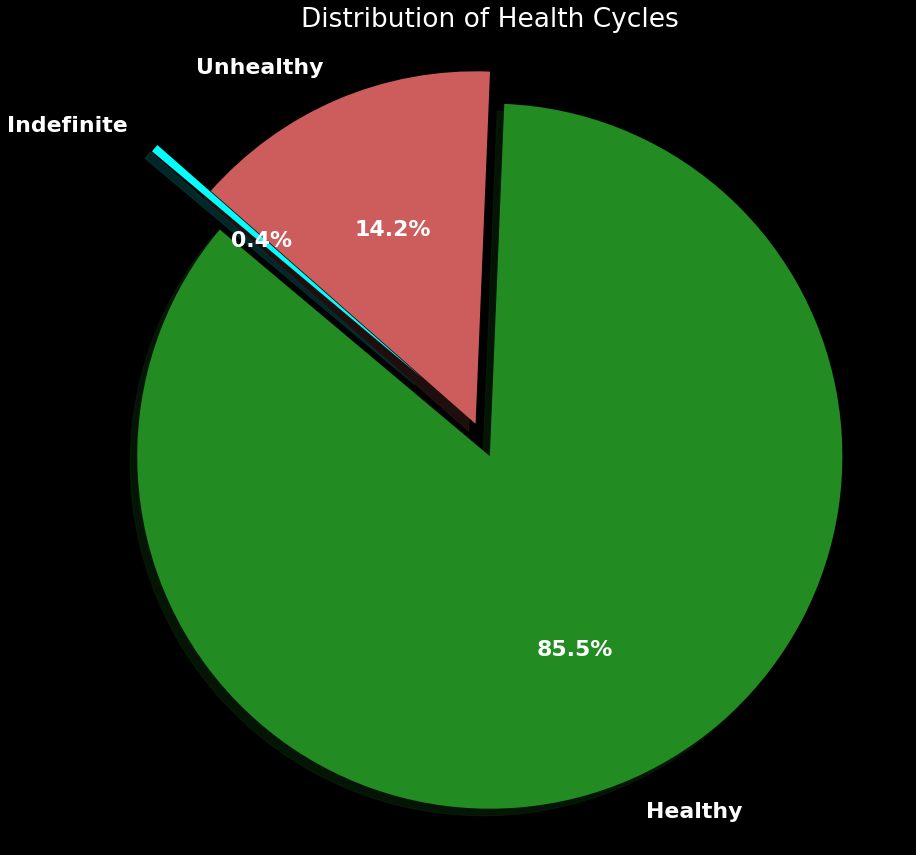

In [55]:
plt.figure(figsize=(15,15))

# Data to plot
labels= 'Healthy','Unhealthy','Indefinite'
sizes = data3['Health'].value_counts()
colors = ['forestgreen','indianred','cyan']
explode = (0.1, 0,0.2)  # explode 3rd slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.title('Distribution of Health Cycles')
plt.show()

## SMOTE for imbalance classification

In [56]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()

In [130]:
drop_sensors = ["s_1", "s_5", "s_6", "s_10", "s_16", "s_18", "s_19" , "week"]



In [128]:
test_data2.Health.value_counts()

Healthy                        12789
Unhealthy                        275
Health cannot be determined       32
Name: Health, dtype: int64

In [145]:
X_train_clf = data3.drop(columns= ["id", "cycles", "op1", "op2", "op3", "Health", "RUL"] + drop_sensors)

In [146]:
X_train_clf.head(1)

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,increasing,decreasing,EWM
0,641.82,1589.7,1400.6,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.419,8808.6195,1138.499,8810.380955


In [147]:
X_test_clf = test_data.drop(columns= ["id", "cycles", "op1", "op2", "op3", "Health", "RUL"] + drop_sensors)
X_test_clf.sample(1)

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,increasing,decreasing,EWM
7647,642.66,1580.85,1402.36,554.24,2388.11,9060.0,47.32,521.78,2388.11,8137.26,8.3972,392,38.96,23.3962,8802.4872,1138.3762,8807.472472


In [148]:
y_train_clf = data3["Health"]

y_test_clf = test_data2["Health"]

In [149]:
X_train_clf, y_train_clf = smote.fit_resample(X_train_clf, y_train_clf)
X_test_clf,y_test_clf=smote.fit_resample(X_test_clf,y_test_clf)

In [136]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [150]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV


xgb_classifier=XGBClassifier()

xgb_classifier.fit(X_train_clf, y_train_clf)




XGBClassifier(objective='multi:softprob')

In [151]:
from sklearn.metrics import recall_score,classification_report
y_pred=xgb_classifier.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred))

                             precision    recall  f1-score   support

Health cannot be determined       0.97      0.39      0.55     12789
                    Healthy       0.60      0.97      0.74     12789
                  Unhealthy       0.98      0.97      0.98     12789

                   accuracy                           0.78     38367
                  macro avg       0.85      0.78      0.76     38367
               weighted avg       0.85      0.78      0.76     38367



In [152]:
y_test_clf

0          Healthy
1          Healthy
2          Healthy
3          Healthy
4          Healthy
           ...    
38362    Unhealthy
38363    Unhealthy
38364    Unhealthy
38365    Unhealthy
38366    Unhealthy
Name: Health, Length: 38367, dtype: object

In [153]:
np.unique(y_test_clf, return_counts=True)

(array(['Health cannot be determined', 'Healthy', 'Unhealthy'],
       dtype=object), array([12789, 12789, 12789]))

In [154]:
Y =  pd.DataFrame({"y_test": y_test_clf, "y_pred": y_pred})
Y

,y_test,y_pred
0,Healthy,Healthy
1,Healthy,Healthy
2,Healthy,Healthy
3,Healthy,Healthy
4,Healthy,Healthy
...,...,...
38362,Unhealthy,Unhealthy
38363,Unhealthy,Unhealthy
38364,Unhealthy,Unhealthy
38365,Unhealthy,Unhealthy


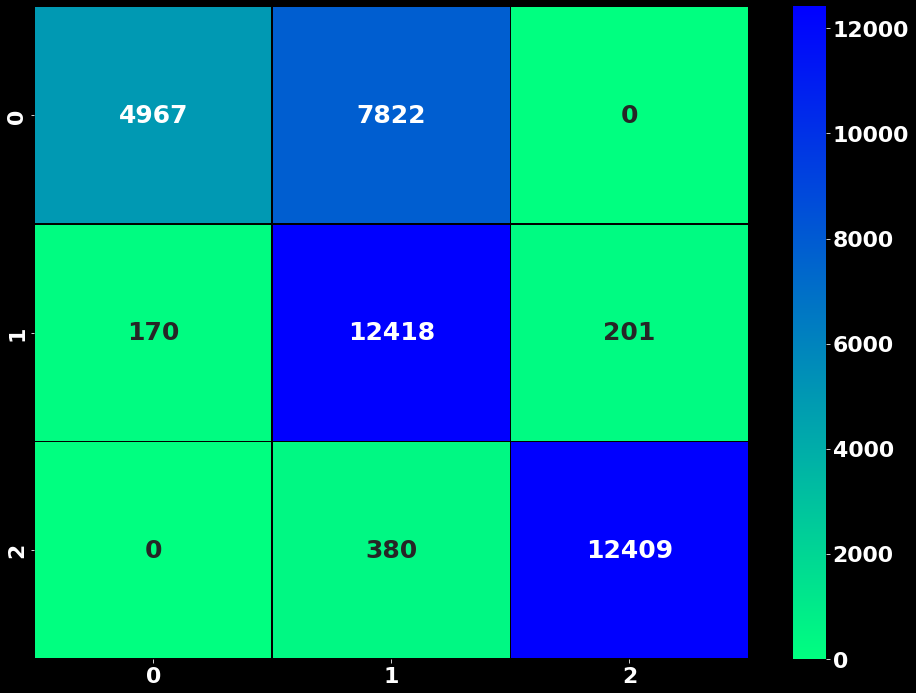

In [155]:
cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(16,12))
sns.heatmap(cm,annot=True,annot_kws={"size": 25},linewidths=0.7,linecolor="black",cmap="winter_r",fmt="d")

In [156]:
fi = pd.Series(xgb_classifier.feature_importances_)

In [157]:
Features = X_train_clf.columns.tolist()
df_FI = pd.DataFrame({"FI": fi, "Feature": Features })

In [158]:
df_FI ## Interesting it seems other features does not seem to impact the Health as much as RUL and EWM (Reason could be scaling as well) Lets see if it is same for regression

,FI,Feature
0,0.013018,s_2
1,0.025413,s_3
2,0.019137,s_4
3,0.051263,s_7
4,0.022183,s_8
5,0.039782,s_9
6,0.043405,s_11
7,0.011885,s_12
8,0.014515,s_13
9,0.067572,s_14


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

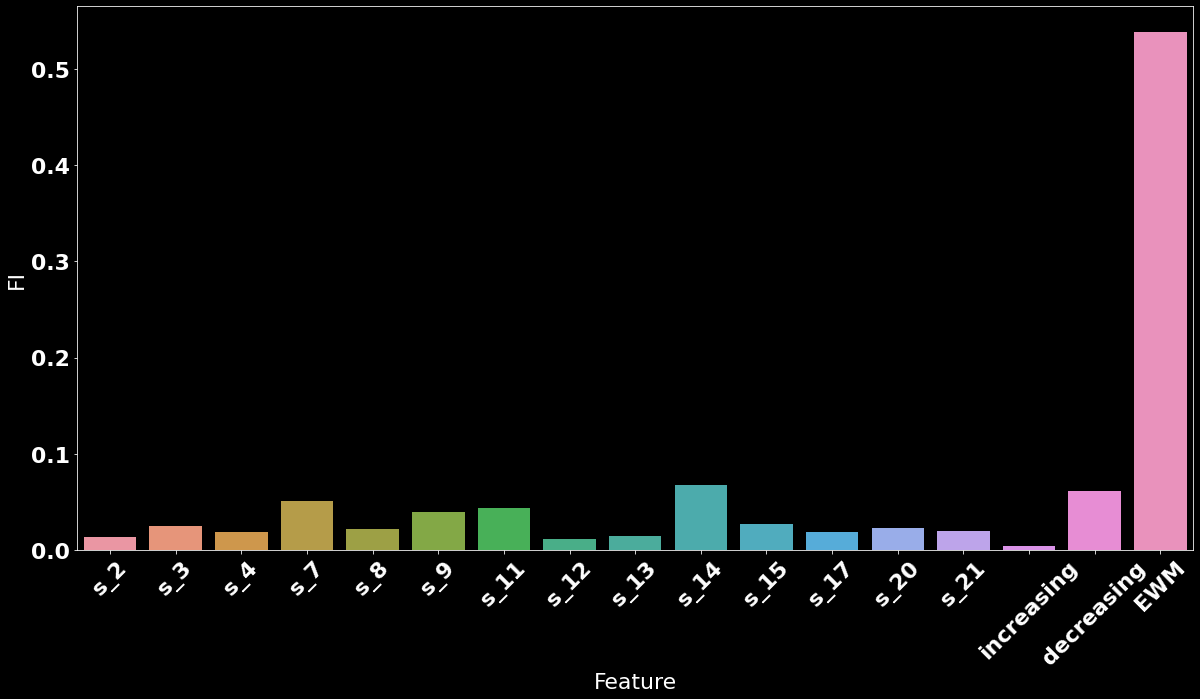

In [159]:
sns.barplot(data= df_FI, x="Feature", y="FI")
plt.xticks(rotation=45)

## F_Regression

In [160]:
 X_train_reg = data3[data3["Health"]=="Unhealthy"].drop(columns=["id", "cycles", "op1", "op2", "op3", "Health","RUL", "week"] + drop_sensors)

In [161]:
X_test_reg = test_data2[test_data2["Health"]=="Unhealthy"].drop(columns=["id", "cycles", "op1", "op2", "op3", "Health","RUL", "week"] + drop_sensors)

In [162]:
from sklearn.feature_selection import f_regression

y_train_reg = data3[data3["Health"]=="Unhealthy"]["RUL"]
f_scores = f_regression(X_train_reg, y_train_reg)


Text(0.5, 1.0, 'F-score  for numerical features')

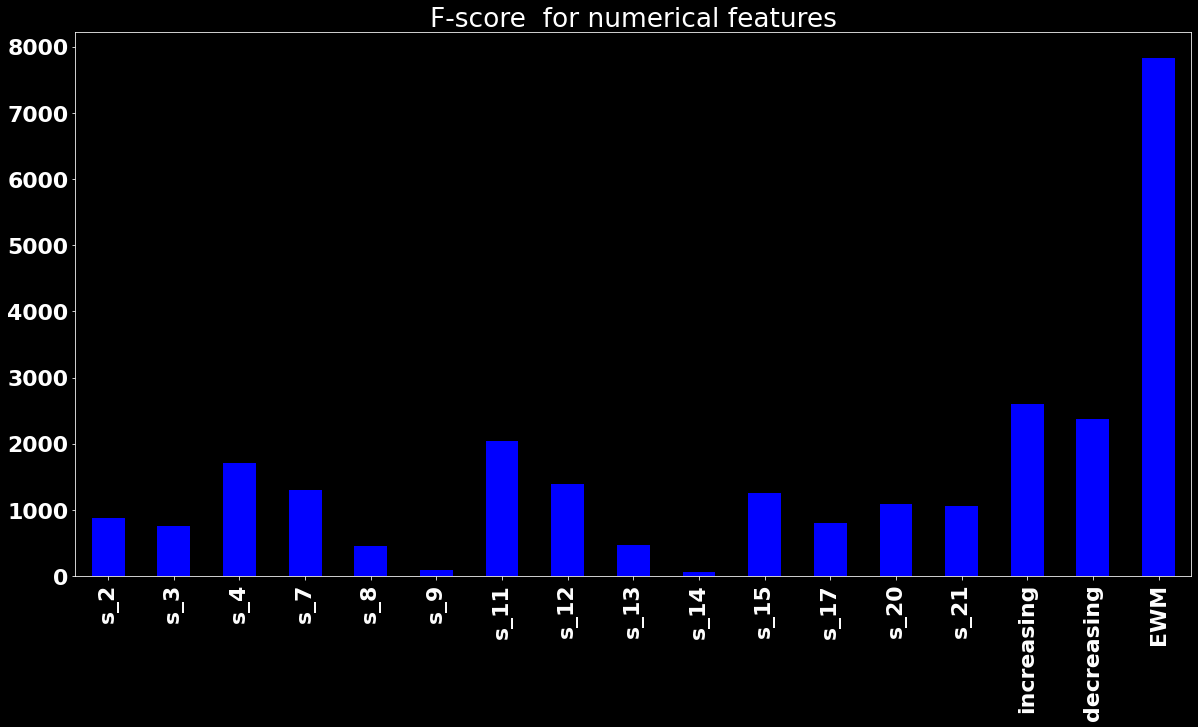

In [163]:
p_series= pd.Series(f_scores[0],index= X_train_reg.columns)

p_series.plot(kind='bar',color='blue')

plt.title('F-score  for numerical features')